<a href="https://colab.research.google.com/github/danjessicali/Stock-Price-Prediction/blob/main/Stock_Market_Analysis_%2B_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##In this Notebook, I used stock price data from Yahoo Finance to 

###1) Explore on the daily return, moving average and quantify risk

###2) Using created new features to predict future prices (LSTM)

In order to validate the features, I used figures acrossing the selected 6 Tech companies to visualize the data. 

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split

###Download stock data for 6 leading Tech Company from Yahoo Finance

In [9]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','META','NVDA']
company_name = ['Apple','Google','Microsoft','Amazon','Meta','Nvidia']
# Set up start time (a year before today's date)
# Set up end time (today's time)
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [23]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NVDA]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-09-22,144.449997,146.429993,143.699997,145.850006,145.037262,76404300,Apple
2021-09-23,146.649994,147.080002,145.639999,146.830002,146.011826,64838200,Apple
2021-09-24,145.660004,147.470001,145.559998,146.919998,146.101303,53477900,Apple
2021-09-27,145.470001,145.960007,143.820007,145.369995,144.559952,74150700,Apple
2021-09-28,143.250000,144.750000,141.690002,141.910004,141.119247,108972300,Apple


### Explora the dataset

In [16]:
# Google stock
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-09-22 to 2022-09-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [17]:
# Google stock
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,128.678685,130.253078,127.026548,128.580909,128.580909,2.740396e+07
std,14.358573,14.148052,14.299150,14.220039,14.220039,1.042018e+07
min,99.449997,100.989998,99.410004,100.010002,100.010002,5.890265e+06
25%,114.931503,116.900002,113.602997,114.917999,114.917999,2.026400e+07
50%,131.904007,133.538498,129.617493,130.531006,130.531006,2.530200e+07
75%,141.554504,142.644501,139.902496,141.521500,141.521500,3.205800e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,8.975000e+07


1. The prices change over time

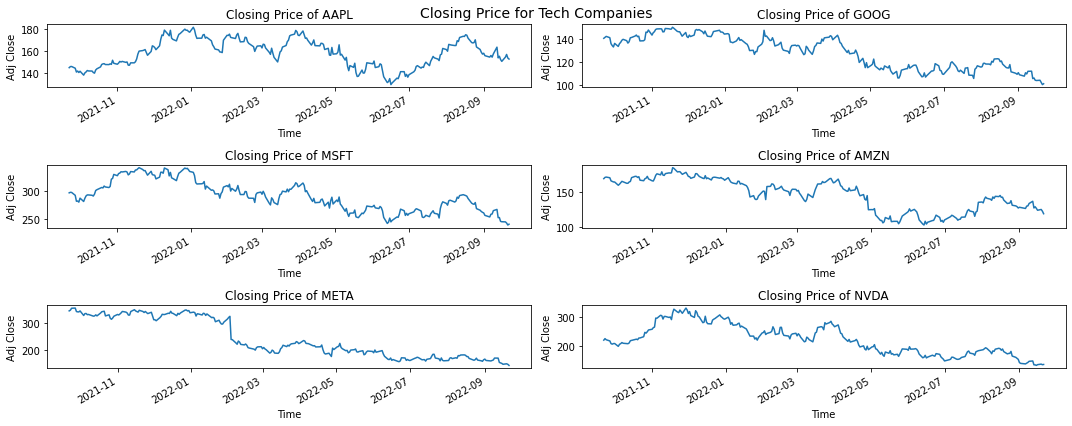

In [33]:
# Data Visualization for all 6 companies
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('Time')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.suptitle('Closing Price for Tech Companies', fontsize=14)
plt.tight_layout()

All closing prices have a tendency of decreaseing

2. Moving Average

In [34]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

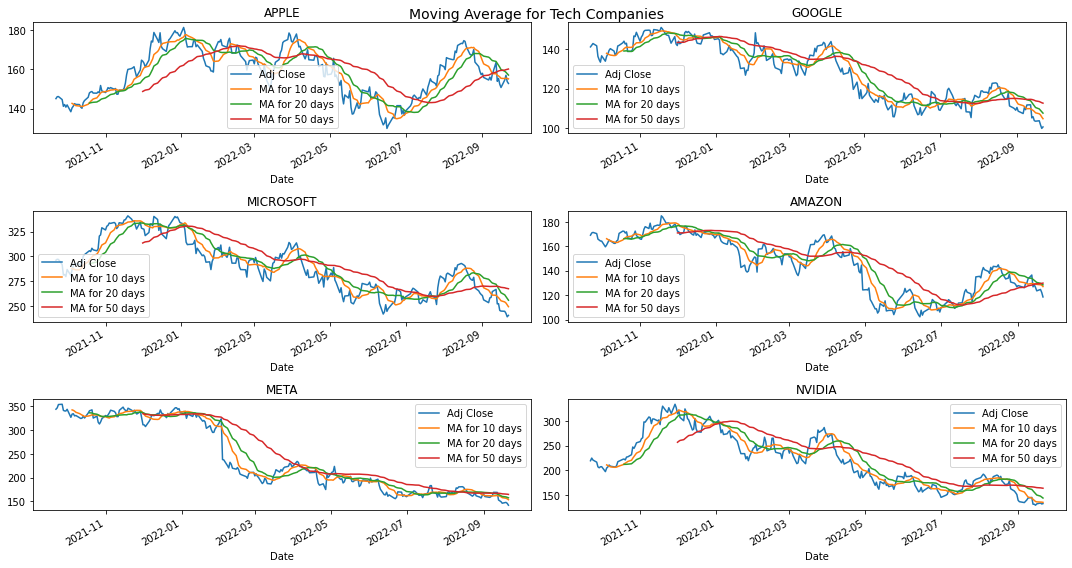

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

META[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('META')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('NVIDIA')

plt.suptitle('Moving Average for Tech Companies', fontsize=14)
fig.tight_layout()

3. What was the daily return of the stock on average?

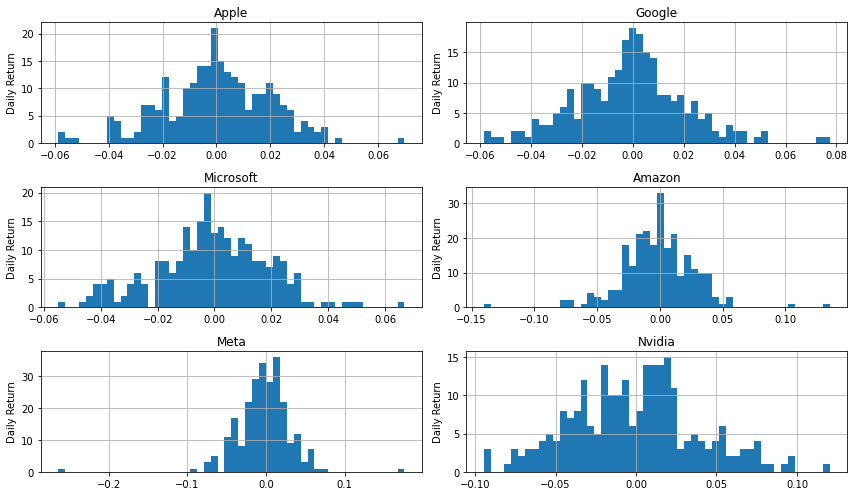

In [69]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

4. Correlation between Stocks' Closing Prices

In [59]:
# Grab all the closing prices for the tech stock list into one DataFrame

df_concat = pd.concat([AAPL['Daily Return'], 
                       GOOG['Daily Return'],
                       MSFT['Daily Return'],
                       META['Daily Return'],
                       AMZN['Daily Return'],
                       NVDA['Daily Return']], axis=1)

df_concat.columns = ['AAPL','GOOG','MSFT','AMZN','META','NVDA']
df_concat.head()

,AAPL,GOOG,MSFT,AMZN,META,NVDA
Date,,,,,,
2021-09-22,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-23,0.006719,0.006301,0.003282,0.008013,0.010636,0.024657
2021-09-24,0.000613,0.005686,-0.000701,0.020234,0.002787,-0.017837
2021-09-27,-0.010550,-0.007936,-0.017304,0.001757,-0.005757,-0.019066
2021-09-28,-0.023801,-0.037576,-0.036204,-0.036569,-0.026378,-0.044367


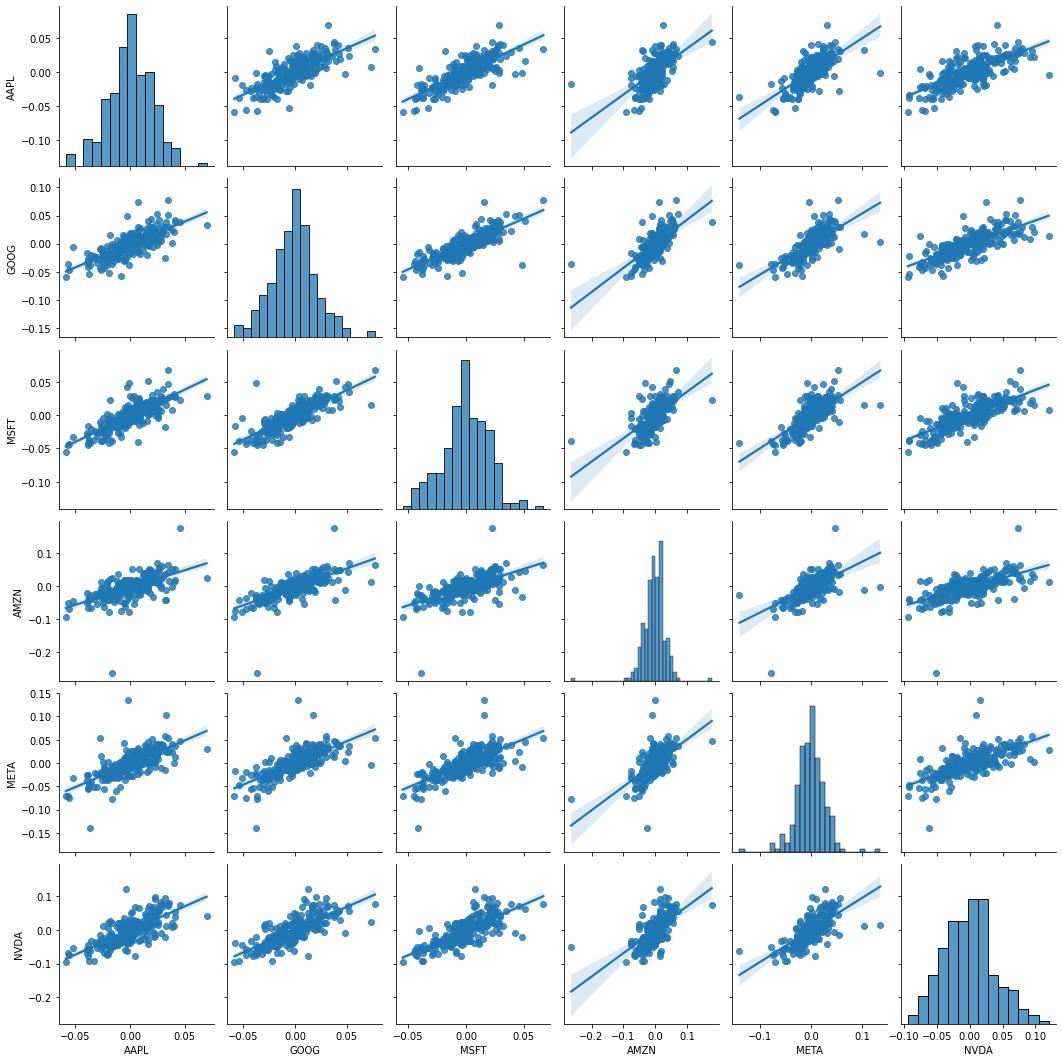

In [61]:
# pairplot for stocks

sns.pairplot(df_concat, kind='reg')

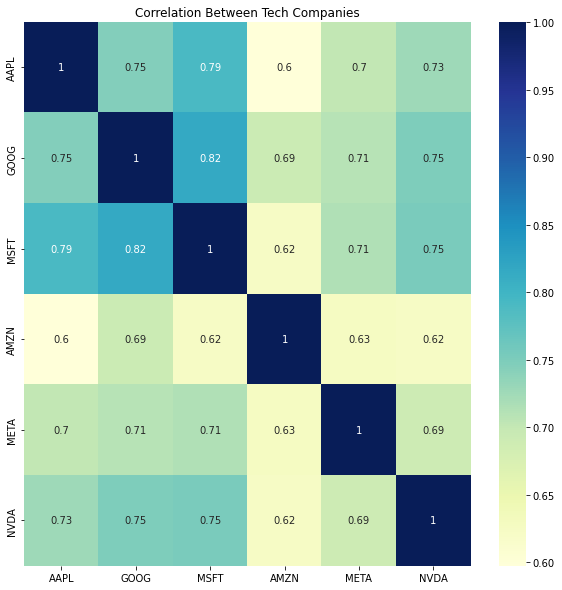

In [66]:
fig, ax = plt.subplots(figsize=(10,10))  
ax.set_title('Correlation Between Tech Companies')
sns.heatmap(df_concat.corr(), annot=True, cmap="YlGnBu")

We can see strong correlation between Google and Microsoft.

### Quantify Risk
#### using std/mean

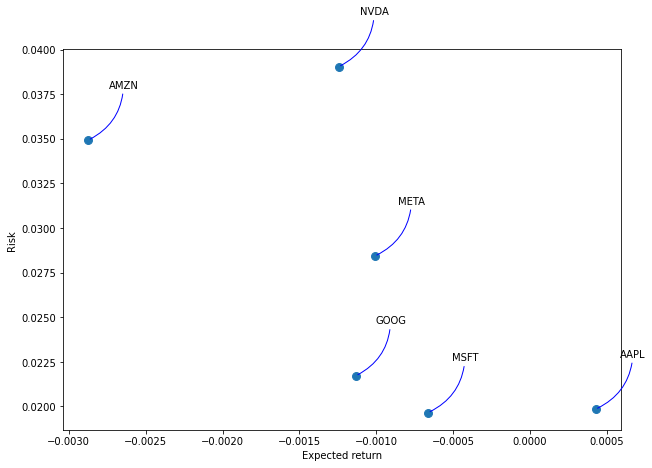

In [72]:
daily_return = df_concat.dropna()
area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(daily_return.mean(), daily_return.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(daily_return.columns, daily_return.mean(), daily_return.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [73]:
daily_return.mean()

AAPL    0.000428
GOOG   -0.001131
MSFT   -0.000661
AMZN   -0.002872
META   -0.001007
NVDA   -0.001243
dtype: float64

###Predict the Stock Price
#### Using LSTM
LSTM could retain the pattern of previous data, and overcome the long-term dependency faced by other models. It has feedback connection, and there are three states:
1. forget state:
 - previous hidden state and new input data fed into the neural network
 - network generates vector using sigmoid activation (0: input component is irrelevent, 1: input component is relevent)
 - vector pointwist multiplied with the previouse cell state

In summary: determine which pieces of the Long-term memory should be forgetten (less weight), given the hidden state and new data point in the sequence.

2. New Memory network + input gate

Determine what new information should be added to the networks' long term memory (cell state).

 - New memory nework (tanh activated neural network): use previous hidden state and new input data and provide vector (values in -1 and 1), which tells how much we should update the LTM network. the -1 tells us if it is necessary to reduce the impact of a component in the cell state.

 - determine which new input data is worth remembering, using sigmoid activated network to determine which new memeory vector worth retaining. 

 - part 1 (tanh) and part 2 (sigmoid) pointwise multiplied, and created new combined vector, which then added to cell state.

 3. Output Gate

 Determining the new hidden state using newly updated cell state, previous hidden state and new input data.


 - previous hidden state + new input data --> sigmoid --> a filter vector of 1 and 0
 - new cell state --> tanh --> vector of 1 and -1
 - pointwise multiplication --> output new hidden state





In [78]:
AAPL_new = daily_return[['AAPL']]
AAPL_new.head()

,AAPL
Date,
2021-09-23,0.006719
2021-09-24,0.000613
2021-09-27,-0.010550
2021-09-28,-0.023801
2021-09-29,0.006483


In [87]:
# train test split
train_ind = int(len(AAPL_new)*0.8)
train = AAPL_new[:train_ind]
test = AAPL_new[train_ind:]
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train)
len(scaled_train)

200

In [92]:
def get_x_y_pairs(train_scaled, train_periods):
    """
    train_scaled - training sequence
    train_periods - How many data points to use as inputs
    """
    x_train = []
    y_train = []
    for i in range(train_periods, len(train_scaled)):
      x_train.append(train_scaled[i-train_periods:i])
      y_train.append(train_scaled[i])
    
    return x_train, y_train

train_periods = 60

x_train, y_train = get_x_y_pairs(scaled_train, train_periods)
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(x_train.shape)
print(y_train.shape)

(140, 60, 1)
(140, 1)


In [93]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

140/140 [==============================] - 8s 33ms/step - loss: 0.0419


In [94]:
x_test, y_test = get_x_y_pairs(scaled_train, train_periods)
# Convert the x_train and y_train to numpy arrays 
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print(x_test.shape)
print(y_test.shape)  

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

(140, 60, 1)
(140, 1)


0.47444316102934925

In [97]:
daily_return.head()

,AAPL,GOOG,MSFT,AMZN,META,NVDA
Date,,,,,,
2021-09-23,0.006719,0.006301,0.003282,0.008013,0.010636,0.024657
2021-09-24,0.000613,0.005686,-0.000701,0.020234,0.002787,-0.017837
2021-09-27,-0.010550,-0.007936,-0.017304,0.001757,-0.005757,-0.019066
2021-09-28,-0.023801,-0.037576,-0.036204,-0.036569,-0.026378,-0.044367
2021-09-29,0.006483,-0.012211,0.001693,-0.003053,-0.004475,-0.008793


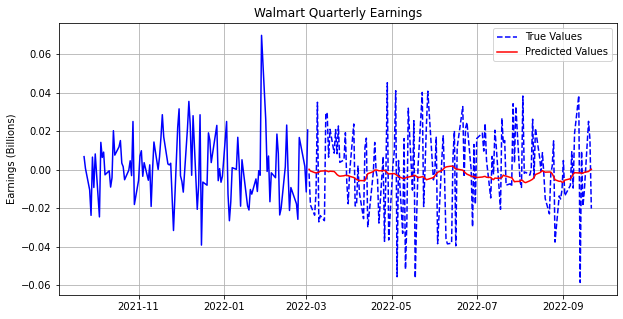

In [98]:
import datetime as dt
x = [dt.datetime.date(d) for d in AAPL_new.index]
fig = plt.figure(figsize=(10,5))
plt.title('Walmart Quarterly Earnings')
plt.ylabel('Earnings (Billions)')
plt.grid(True)
plt.plot(x[:-len(predictions)],
         AAPL_new.AAPL[:-len(predictions)],
         "b-")
plt.plot(x[-len(predictions):],
         AAPL_new.AAPL[-len(predictions):],
         "b--",
         label='True Values')
plt.plot(x[-len(predictions):],
         predictions,
         "r-",
         label='Predicted Values')
plt.legend()